<a href="https://colab.research.google.com/github/randy-tsukemen/Data_science_roadmap/blob/master/Customer_Analytics_and_A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Performance Indicators: Measuring Business Success

What is A/B testing?
- A/B Testing: Test different ideas against each other in the real world
- Choose the one that statistically performs better

Why is A/B testing important?
- No guessing
- Provides accurate answers - quickly
- Allows to rapidly iterate on ideas
- establish causal relationships

A/B test process
1. Develop a hypothesis about your product or
business
2. Randomly assign users to two different groups
3. Expose:
  - Group 1 to the the current product rules
  - Group 2 to a product that tests the
hypothesis
4. Pick whichever performs better according to a
set of KPIs

Where can A/B testing be used?

Users + ideas → A/B test
- testing impact of drugs
- incentivizing spending
- driving user growth
- many more!

Course progression
1. Understanding users — Key Performance Indicators
2. Identifying trends — Exploratory Data Analysis
3. Optimizing performance — Design of A/B Tests
4. Data driven decisions — Analyzing A/B Test Results

Key performance indicators (KPIs)
- A/B Tests: Measure impact of changes on KPIs
- KPIs — metrics important to an organization
 - likelihood of a side-effect
  - revenue
  - conversion rate

How to identify KPIs

Experience + Domain knowledge + Exploratory data analysis
- Experience & Knowledge - What is important to a business
- Exploratory Analysis - What metrics and relationships impact these KPIs

Next Up...
- Exploratory Data Analysis (EDA)
- Identify KPIs and areas for further analysis

which of the following do you think is the key component of an A/B test's usefulness?

Having the users be randomly assigned to groups.

which of the following do you think is the key component of an A/B test's usefulness?



Example: meditation app
- Services
  - Paid subscription
  - In-app purchases
- Goals/KPIs
  - Maintain high free → paid conversion rate

Dataset 1: User demographics

Dataset 2: User actions

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [40]:
# load customer_data
customer_data = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/c3a701a4729471ae0b92d8c300b470fd2ec0a73a/user_demographics_v1.csv')
# print the head of customer_data
print(customer_data.head())

          uid              reg_date device gender country  age
0  54030035.0  2017-06-29T00:00:00Z    and      M     USA   19
1  72574201.0  2018-03-05T00:00:00Z    iOS      F     TUR   22
2  64187558.0  2016-02-07T00:00:00Z    iOS      M     USA   16
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41
4  99231338.0  2017-03-26T00:00:00Z    iOS      M     FRA   59


In [36]:
# load app_purchases
app_purchases = pd.read_csv('https://assets.datacamp.com/production/repositories/1646/datasets/5decd183ef3710475958bbc903160fd6354379d5/purchase_data_v1.csv')
# print the head of app_purchases
print(app_purchases.head())

         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599


Merging on different sets of fields

In [41]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(uid_combined_data.head())
print(len(uid_combined_data))

         date       uid            sku  price  ... device gender country age
0  2017-07-10  41195147  sku_three_499    499  ...    and      M     BRA  17
1  2017-07-15  41195147  sku_three_499    499  ...    and      M     BRA  17
2  2017-11-12  41195147   sku_four_599    599  ...    and      M     BRA  17
3  2017-09-26  91591874    sku_two_299    299  ...    and      M     TUR  17
4  2017-12-01  91591874   sku_four_599    599  ...    and      M     TUR  17

[5 rows x 9 columns]
9006


In [65]:
uid_combined_data.columns

Index(['date', 'uid', 'sku', 'price', 'reg_date', 'device', 'gender',
       'country', 'age', 'month1'],
      dtype='object')

In [ ]:
['Unnamed: 0', 'date', 'uid', 'sku', 'price', 'reg_date', 'device', 'gender', 'country', 'age', 'first_week_purchases']

In [42]:
customer_data['date'] = customer_data.reg_date.str[:10]

In [43]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date       uid             sku  price  ... device gender country age
0  2016-03-30  94055095    sku_four_599    599  ...    iOS      F     BRA  16
1  2015-10-28  69627745     sku_one_199    199  ...    and      F     BRA  18
2  2017-02-02  11604973  sku_seven_1499    499  ...    and      F     USA  16
3  2016-06-05  22495315    sku_four_599    599  ...    and      F     USA  19
4  2018-02-17  51365662     sku_two_299    299  ...    iOS      M     TUR  16

[5 rows x 9 columns]
35


KPI: Conversion Rate
- Conversion Rate: Percentage of users who
subscribe after the free trial
  - Of users who convert within one week? One
month?...
  - Across all users or just a subset?

Choosing a KPI
- Stability over time
- Importance across different user groups
- Correlation with other business factors

KPIs
- Reminder: conversion rate is just one KPI
- Most companies will have many KPIs
- Each serves a different purpose

Practicing aggregations

Notice how the mean is higher than the median? This suggests that we have some users who are making a lot of purchases!

In [44]:
purchase_data = uid_combined_data
# Calculate the mean and median of price and age
purchase_summary = purchase_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


Grouping & aggregating

These values provide a great summary of the customer data which will be useful as you move to optimizing the conversion rate.

In [45]:
# Group the data 
grouped_purchase_data = purchase_data.groupby(by = ['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504    299  179.984378
       M       416.237308    499  195.001520
iOS    F       404.435330    299  181.524952
       M       405.272401    299  196.843197


Goal - comparing our KPIs
- Goal: Examine the KPI "user conversion rate"
after the free trial
- Week One Conversion Rate: Limit to users
who convert in their ?rst week after the trial ends

How to choose KPI metrics?
- Infinitely many potential KPIs
- How long does it take to determine
  - Monthly Conversion Rate = 1 Month Wait time
- Leverage Exploratory Data Analysis
  - Reveals relationships between metrics and key results
- Keep In Mind How do these KPIs and my Business goals relate

Why is conversion rate important?
- Strong measure of growth
- Potential early warning sign of problems
  - Sensitive to changes in the overall ecosystem

Continue exploring conversion rates
- How does this KPI evolve over time?
- See how changes can impact different groups differently

Calculating KPIs

Since our average price is 414 cents which is below $4.99 it seems that our purchasers tend towards the lower priced set of options.

In [52]:
# Compute max_purchase_date
current_date = pd.Timestamp('2018-03-17 00:00:00', tz='UTC')
max_purchase_date = current_date - pd.Timedelta(days=28)

purchase_data['reg_date'] = pd.to_datetime(purchase_data.reg_date, utc=True)
purchase_data['date'] = pd.to_datetime(purchase_data.date, utc=True)
# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                        purchase_data_filt.reg_date + pd.Timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

414.4237288135593


Average purchase price by cohort

This value seems relatively stable over the past 28 days.

In [55]:
# Set the max registration date to be one month before today
max_reg_date = current_date - pd.Timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + pd.Timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


# Exploring and Visualizing Customer Behavior


Exploratory Data Analysis
- Exploratory Data Analysis (EDA)
- Working with time series data
- Uncovering trends in KPIs over time

Example: Week Two Conversion Rate
- Week 2 Conversion Rate Users who subscribe in the second week after the free trial
- Users must have:
  - Completed the free trial
  - Not subscribed in the ?rst week
  - Had a full second week to subscribe or not

Parsing dates

In [60]:
# Provide the correct format for the date
date_data_one = ['Saturday January 27, 2017', 'Saturday December 2, 2017']
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

# Provide the correct format for the date
date_data_two = ['2017-01-01', '2016-05-03']
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

# Provide the correct format for the date
date_data_three = ['08/17/1978', '01/07/1976']
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

# Provide the correct format for the date
date_data_four = ['2016 March 01 01:56', '2016 January 4 02:16']
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)
DatetimeIndex(['2016-03-01 01:56:00', '2016-01-04 02:16:00'], dtype='datetime64[ns]', freq=None)


Conversion rate over time
- Useful Ways to Explore Metrics
  - By user type
  - Over time

Trends in different cohorts
- See how changes interact with different groups
- Compare users of different genders
- Evaluate the impact of a change across regions
- See the impact for different devices

In [87]:
# The maximum date in our dataset
current_date = pd.Timestamp('2018-03-17 00:00:00', tz='UTC')


# Find the week 1 values
first_week_purchases = np.where(
                 (purchase_data.date < purchase_data.reg_date + pd.Timedelta(days=28)),
                  1, 
                  0)
                 
# Update the value in the DataFrame
purchase_data['first_week_purchases'] = first_week_purchases

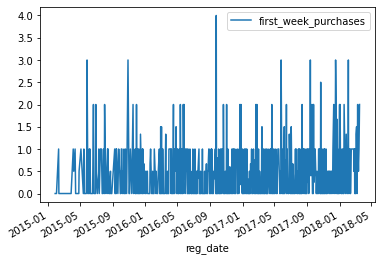

In [88]:
# Group the data and aggregate first_week_purchases
user_purchases = purchase_data.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
# user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

Pivoting our data

There does seem to be an increase in the number of purchases by purchasing users within their first week. Let's now confirm that this is not driven only by one segment of users. 

In [114]:
# Pivot the data
country_pivot = pd.pivot_table(purchase_data, values='first_week_purchases', columns=['country'], index=['reg_date'])
print(country_pivot.head())

country                    BRA  CAN  DEU  FRA  TUR       USA
reg_date                                                    
2015-01-27 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000
2015-02-01 00:00:00+00:00  0.0  NaN  NaN  NaN  NaN       NaN
2015-02-09 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.083333
2015-02-10 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000
2015-03-01 00:00:00+00:00  NaN  NaN  NaN  NaN  NaN  0.000000


In [113]:
# Pivot the data
device_pivot = pd.pivot_table(purchase_data, values='first_week_purchases', columns=['device'], index=['reg_date'])
print(device_pivot.head())

device                          and  iOS
reg_date                                
2015-01-27 00:00:00+00:00       NaN  0.0
2015-02-01 00:00:00+00:00  0.000000  NaN
2015-02-09 00:00:00+00:00  0.083333  NaN
2015-02-10 00:00:00+00:00       NaN  0.0
2015-03-01 00:00:00+00:00       NaN  0.0


Examining the different cohorts

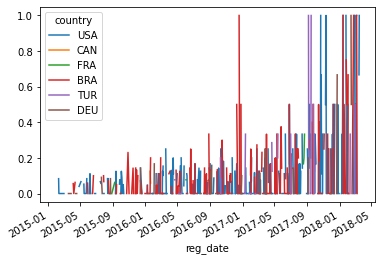

In [115]:
# Plot the average first week purchases for each country by registration date
country_pivot.reset_index().plot(x='reg_date', y=['USA', 'CAN', 'FRA', 'BRA', 'TUR', 'DEU'])
plt.show()

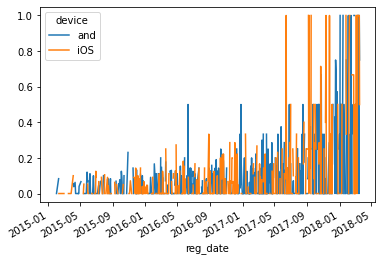

In [117]:
# Plot the average first week purchases for each device by registration date
device_pivot.reset_index().plot(x='reg_date', y=['and', 'iOS'])
plt.show()

Further techniques for uncovering trends

Subscribers Per Day

Weekly seasonality and our pricing change
- Weekly Seasonality: Trends following the
day of the week
  - Potentially more likely to subscribe on
the weekend
  - Seasonality can hide larger trends...the
impact of our price change?